In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
path = 'https://raw.githubusercontent.com/iluciano/bse_mlops/main/loan_default_proba.csv'
data  = pd.read_csv(path,sep=',')

In [7]:
X = data.drop(['Status', 'prob_inad'], axis=1)

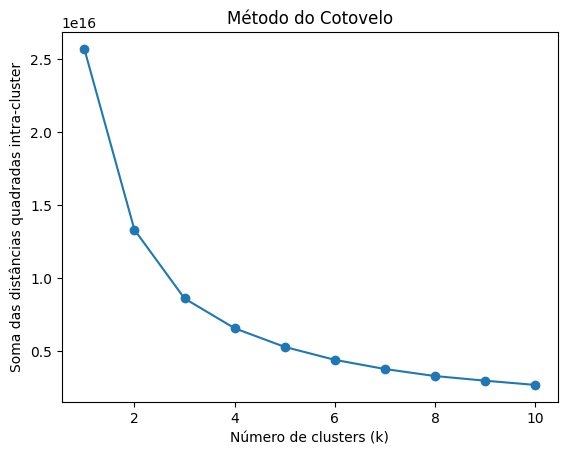

In [9]:
wcss = []
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma das distâncias quadradas intra-cluster')
plt.title('Método do Cotovelo')
plt.show()

In [10]:
labels = kmeans.labels_

In [11]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

In [12]:
data['cluster'] = labels

In [13]:
data.groupby(by='cluster').mean()

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,Status,prob_inad
cluster,,,,,,,,,
0,214065.911177,2.624924,1848.191006,329.576770,1.942814e+05,4685.428511,699.401680,0.371433,0.628562
1,771315.010571,3.033007,2674.879350,334.585624,2.293867e+06,17886.183932,698.457717,0.230973,0.768790
2,375752.403055,3.447690,2839.953259,339.485838,5.183248e+05,6963.232338,700.188261,0.132232,0.867800
3,567155.336378,3.471629,2837.269319,341.869780,9.435914e+05,10545.955463,700.170990,0.125371,0.874596


In [14]:
data.groupby(by='cluster').sum()

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,Status,prob_inad
cluster,,,,,,,,,
0,15159077500,185883.990,1.308796e+08,23338979.0,1.375804e+10,331798620.0,49528130,26303,44511.59
1,1459328000,5738.450,5.060872e+06,633036.0,4.339996e+09,33840660.0,1321482,437,1454.55
2,20561923000,188664.490,1.554079e+08,18577344.0,2.836377e+10,381042000.0,38315702,7236,47487.75
3,12046946500,73740.865,6.026644e+07,7261656.0,2.004282e+10,224006640.0,14872332,2663,18577.29


In [16]:
data.groupby(by='cluster').mean()

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,Status,prob_inad
cluster,,,,,,,,,
0,214065.911177,2.624924,1848.191006,329.576770,1.942814e+05,4685.428511,699.401680,0.371433,0.628562
1,771315.010571,3.033007,2674.879350,334.585624,2.293867e+06,17886.183932,698.457717,0.230973,0.768790
2,375752.403055,3.447690,2839.953259,339.485838,5.183248e+05,6963.232338,700.188261,0.132232,0.867800
3,567155.336378,3.471629,2837.269319,341.869780,9.435914e+05,10545.955463,700.170990,0.125371,0.874596


In [18]:
data['cluster'] = np.where(data['cluster'] == 0, 'Emprestimo Baixo e receita baixa',
                np.where(data['cluster'] == 1, 'Emprestimo alto e receita alta',
                np.where(data['cluster'] == 2, 'Emprestimo medio baixo e receita media baixa',
                np.where(data['cluster'] == 3, 'Emprestimo medio alto e receita media alta', ''))))

In [22]:
data

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,Status,prob_inad,cluster
0,206500,0.000,0.00,360.0,0.0,4980.0,552,1,0.0,Emprestimo Baixo e receita baixa
1,466500,0.000,0.00,360.0,0.0,0.0,765,1,0.0,Emprestimo Baixo e receita baixa
2,656500,0.000,0.00,360.0,0.0,8640.0,880,1,0.0,Emprestimo Baixo e receita baixa
3,106500,0.000,0.00,240.0,0.0,1680.0,880,1,0.0,Emprestimo Baixo e receita baixa
4,406500,0.000,0.00,360.0,0.0,7560.0,768,1,0.0,Emprestimo Baixo e receita baixa
...,...,...,...,...,...,...,...,...,...,...
148665,246500,4.125,3427.25,300.0,428000.0,4800.0,851,0,1.0,Emprestimo medio baixo e receita media baixa
148666,246500,3.875,4661.38,360.0,428000.0,7920.0,645,0,1.0,Emprestimo medio baixo e receita media baixa
148667,656500,0.000,0.00,360.0,708000.0,11700.0,525,1,0.0,Emprestimo medio alto e receita media alta
148668,656500,3.490,1190.05,360.0,708000.0,0.0,798,0,1.0,Emprestimo medio alto e receita media alta


In [20]:
with open("/Users/igorl/OneDrive/Documentos/Python Scripts/mlops/models/modelo2.pkl", "wb") as file:
    pickle.dump(kmeans, file)